In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "/data/user/tvaneede/GlobalFit/EventGenerator/hdf/test_1000files.hdf5"
# file_path = "/data/ana/Diffuse/GlobalFit_Flavor/taupede/SnowStorm/RecowithBfr/Baseline/hdf_files/NoDeepCore/22043_DoubleCascades.hdf5"
# file_path = "/data/user/tvaneede/datasets/taupede/SnowStorm/NoDeepCore/hdf_files/RecowithBfr/Baseline/22049/22049_0000000-0000999_DoubleCascades.hdf5"
# file_path = "/data/user/tvaneede/datasets/taupede/MuonGun/NoDeepCore/hdf_files/RecowithBfr/21315_DoubleCascades_0011000-0011999.hdf5"
plotting_path = "/data/user/tvaneede/GlobalFit/EventGenerator/notebooks/output/"

In [3]:
import h5py

# Open the HDF5 file in read mode
with h5py.File(file_path, "r") as f:
    # List all keys (groups and datasets)
    keys = list(f.keys())
    print(keys)

['ConventionalAtmosphericPassingFractions', 'DeepCore_Charge', 'FinalEventClass', 'FinalTopology', 'HESEEventclass', 'HESEMillipedeFitDepositedEnergy', 'HESEMillipedeFitFitParams', 'HESEMillipedeFitTruncatedDepositedEnergy', 'HESETaupedeFit1', 'HESETaupedeFit2', 'I3EventHeader', 'I3MCWeightDict', 'MCInteractionDepth', 'MCInteractionEventclass', 'MCReconstructionEventclass', 'MyEgeneratorOutputFrameKey', 'PromptAtmosphericPassingFractions', 'RecoAzimuth', 'RecoDirection', 'RecoEConfinement', 'RecoERatio', 'RecoETot', 'RecoEnergy', 'RecoL', 'RecoLbyE', 'RecoLength', 'RecoLogE1', 'RecoLogE2', 'RecoLogETot', 'RecoLogL', 'RecoParticle', 'RecoZenith', 'TotalCharge', 'TotalWeight', 'TotalWeightPol', 'TrueAzimuth', 'TrueE1', 'TrueE2', 'TrueETot', 'TrueL', 'TrueLength', 'TrueZenith', '__I3Index__', 'y_had', 'y_lep']


In [16]:
# ### HDF Keys ###
# hdfkeys = []
# hdfkeys += ['TaupedeFitParticles','TaupedeFit','TaupedeFitFitParams','SnowstormParameterDict']


hdfkeys = []
hdfkeys += ['MCInteractionEventclass','TrueL','TrueETot','TrueE1','TrueE2','TrueZenith', 'TrueAzimuth']
hdfkeys += ['RecoLogL', 'RecoERatio', 'RecoEConfinement', 'RecoLogE1', 'RecoLogE2', 'RecoLogETot', 'RecoZenith', 'RecoAzimuth',"RecoL"]
hdfkeys += ['RecoParticle']
hdfkeys += ['HESETaupedeFit1','HESETaupedeFit2'] # , 'HESETaupedeFitFitParams'
hdfkeys += ['MyEgeneratorOutputFrameKey']
hdfkeys += ['HESEEventclass', "FinalTopology"]
hdfkeys += ['RecoETot']
hdfkeys += ['FinalTopology','DeepCore_Charge','TotalCharge']
hdfkeys += ['I3MCWeightDict', 'MCInteractionEventclass']
# hdfkeys += ['HESEMonopodFit_x', 'HESEMonopodFit_y', 'HESEMonopodFit_z']
# hdfkeys += ['HESETaupedeFit1_x', 'HESETaupedeFit1_y', 'HESETaupedeFit1_z']
# hdfkeys += ['HESETaupedeFit2_x', 'HESETaupedeFit2_y', 'HESETaupedeFit2_z']



# dfs = [pd.read_hdf(file_path, key=key) for key in hdfkeys]  # Read each dataset into a DataFrame
dfs = {key: pd.read_hdf(file_path, key=key) for key in hdfkeys}

df_combined = pd.concat(dfs, axis=1)  # Combine them column-wise based on the index

df_combined

# print(df_combined.keys())
# df_combined["I3MCWeightDict"]['InteractionType']
# df_combined["HESETaupedeFit1_z"]

# dfs[4]["valu"]


# print(df_combined['HESEEventclass']["value"], df_combined['FinalTopology']["value"])

MCInteractionEventclass                                             \
                         Run Event SubEvent SubEventStream exists value   
0                 2208600185     0        0              0      1   2.0   
1                 2208600185   146        0              0      1   3.0   
2                 2208600185   352        0              0      1   2.0   
3                 2208600569   254        0              0      1   2.0   
4                 2208600569   329        0              0      1   1.0   
...                      ...   ...      ...            ...    ...   ...   
4190              2208600446   249        0              0      1   1.0   
4191              2208600903     2        0              0      1   2.0   
4192              2208600903   236        0              0      1   3.0   
4193              2208600903   335        0              0      1   1.0   
4194              2208600903   374        0              0      1   1.0   

           TrueL                                ...  I3MCWeightDict          \
             Run Event SubEvent SubEventStream  ... SelectionWeight SimMode   
0     2208600185     0        0              0  ...             1.0     0.0   
1     2208600185   146        0              0  ...             1.0     0.0   
2     2208600185   352        0              0  ...             1.0     0.0   
3     2208600569   254        0              0  ...             1.0     0.0   
4     2208600569   329        0              0  ...             1.0     0.0   
...          ...   ...      ...            ...  ...             ...     ...   
4190  2208600446   249        0              0  ...             1.0     0.0   
4191  2208600903     2        0              0  ...             1.0     0.0   
4192  2208600903   236        0              0  ...             1.0     0.0   
4193  2208600903   335        0              0  ...             1.0     0.0   
4194  2208600903   374        0              0  ...             1.0     0.0   

                                                                    \
     SolidAngle TotalColumnDepthCGS TotalPrimaryWeight TotalWeight   
0     12.566371        6.696918e+05                1.0    0.000433   
1     12.566371        3.195322e+05                1.0    0.001059   
2     12.566371        3.361532e+05                1.0    0.001018   
3     12.566371        3.215076e+05                1.0    0.000439   
4     12.566371        6.517283e+05                1.0    0.001689   
...         ...                 ...                ...         ...   
4190  12.566371        4.820991e+05                1.0    0.000900   
4191  12.566371        3.870277e+06                1.0    0.002467   
4192  12.566371        3.207772e+05                1.0    0.000342   
4193  12.566371        1.895497e+06                1.0    0.003905   
4194  12.566371        3.033514e+05                1.0    0.000726   

                                                                               
     TotalXsectionCGS TrueActiveLengthAfter TrueActiveLengthBefore TypeWeight  
0        1.081156e-33           1098.803342            6265.997666        0.5  
1        5.547572e-33           1093.674557            2224.032055        0.5  
2        5.070988e-33           1187.281167            2303.069336        0.5  
3        2.286295e-33            959.069764            2379.121579        0.5  
4        4.340378e-33           1128.430384            5638.265153        0.5  
...               ...                   ...                    ...        ...  
4190     3.125978e-33           1234.014227            4062.994069        0.5  
4191     1.068826e-33           1298.220015           14747.237106        0.5  
4192     1.782577e-33           1075.396028            2255.244491        0.5  
4193     3.458660e-33            972.714057           19901.307085        0.5  
4194     4.004368e-33            968.009906            2181.675329        0.5  

[4195 rows x 260 columns]

In [59]:
print("what is what")
print(10*"-", "HESETaupedeFitFitParams")

print(10*"-", "HESETaupedeFit1")
print( "Event",df_combined["HESETaupedeFit1"]['Event'].iloc[0] )
print( "length",df_combined["HESETaupedeFit1"]['length'].iloc[0] )
print( "zenith",df_combined["HESETaupedeFit1"]['zenith'].iloc[0] )
print( "x",df_combined["HESETaupedeFit1"]['x'].iloc[0] )
print(10*"-", "RecoParticle")
print( "Event",df_combined["RecoParticle"]['Event'].iloc[0] )
print( "length",df_combined["RecoParticle"]['length'].iloc[0] )
print( "zenith",df_combined["RecoParticle"]['zenith'].iloc[0] )
print( "x",df_combined["RecoParticle"]['x'].iloc[0] )
print(10*"-", "Var")
print( "10**RecoLogL",10**df_combined["RecoLogL"]['value'].iloc[0] )
print( "RecoL",df_combined["RecoL"]['value'].iloc[0] )
print( "RecoZenith",df_combined["RecoZenith"]['value'].iloc[0] )




what is what
---------- HESETaupedeFitFitParams
---------- HESETaupedeFit1
Event 3087
length 71.79329848293173
zenith 0.41472839424730257
x 42.5645702959136
---------- RecoParticle
Event 3087
length 71.79329848293173
zenith 0.41472839424730257
x 42.5645702959136
---------- Var
10**RecoLogL 71.79329848293172
RecoL 71.79329848293173
RecoZenith 0.41472839424730257


In [17]:
selections = {
    "RecoETot>60TeV" : ( df_combined['RecoETot']["value"] > 60000 ),
    "TrueDoubleCascade" : (df_combined["MCInteractionEventclass"]['value'] == 2) ,
    "TrueSingleCascade" : (df_combined["MCInteractionEventclass"]['value'] == 1) ,
    "HESEDoubleCascade" : ( df_combined['FinalTopology']["value"] == 2.0 ),
    "HESEDoubleCascade TrueDouble" :  ( df_combined['MCInteractionEventclass']["value"] == 2.0 ) & ( df_combined['FinalTopology']["value"] == 2.0 ),
    "HESEDoubleCascade TrueSingle" :  ( df_combined['MCInteractionEventclass']["value"] == 1.0 ) & ( df_combined['FinalTopology']["value"] == 2.0 ),

    # energy
    "TrueETot>0" : ( df_combined['TrueETot']["value"] > 0 ),

}

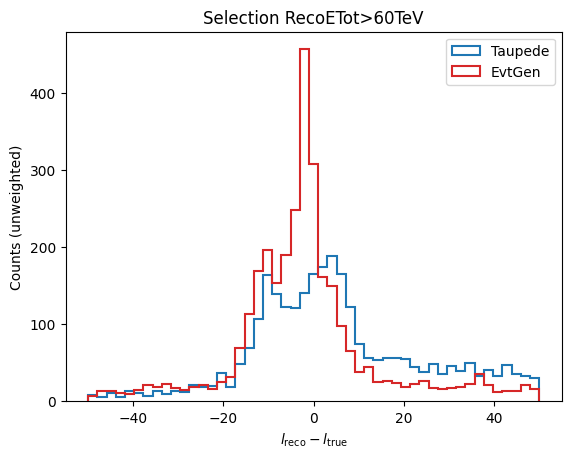

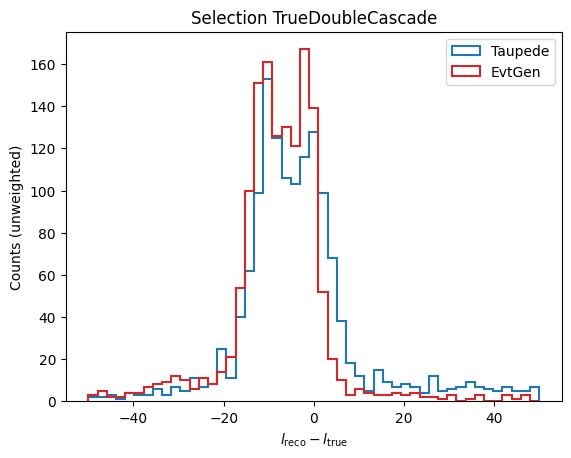

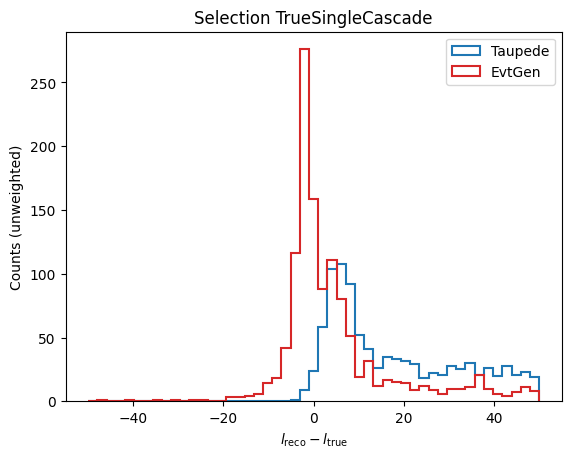

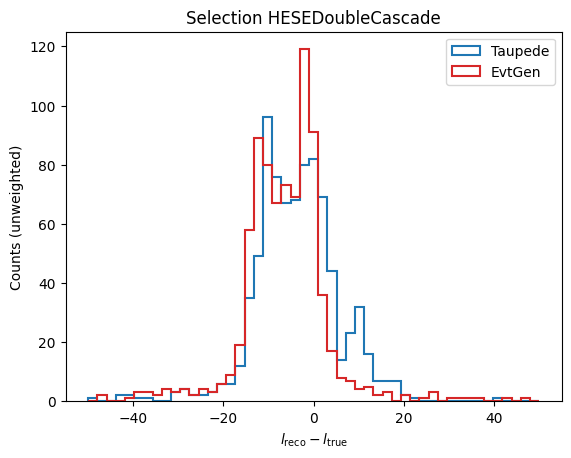

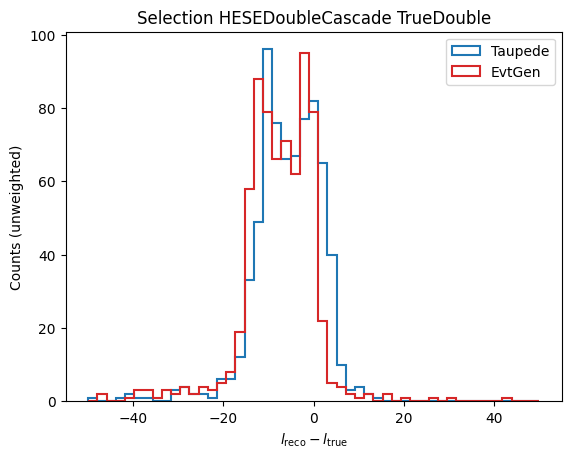

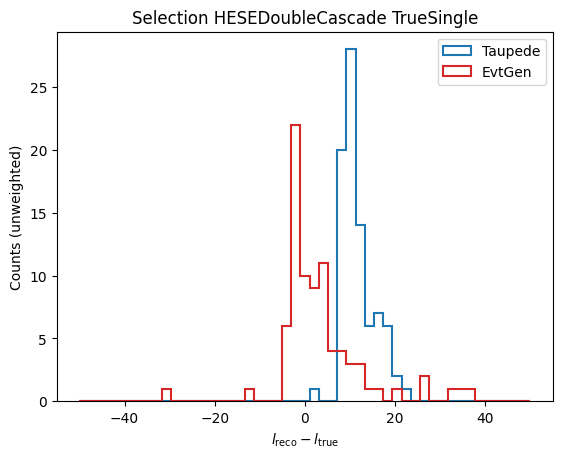

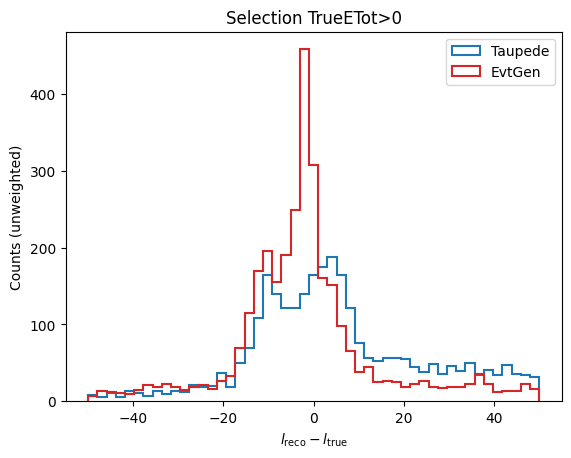

In [18]:
def plot_length_resolution( selection, bins, name ):

    fig, ax = plt.subplots()

    ax.hist( df_combined["HESETaupedeFit1"]["length"][selection] - df_combined["TrueL"]["value"][selection], bins=bins, histtype='step', color='C0', linewidth=1.5, label="Taupede")
    ax.hist( df_combined["MyEgeneratorOutputFrameKey"]["cascade_cascade_00001_distance"][selection] - df_combined["TrueL"]["value"][selection] , bins=bins, histtype='step', color='C3', linewidth=1.5, label="EvtGen")

    ax.set_xlabel(r"$l_{\rm reco} - l_{\rm true}$")
    ax.set_ylabel(r"Counts (unweighted)")
    ax.set_title(f"Selection {name}")

    ax.legend()

    plt.savefig( f"{plotting_path}/length_resolution_selection-{name}.png" )

    plt.show()


bins = np.linspace(-50, 50, 50)

for selection in selections:
    plot_length_resolution( selections[selection], bins, selection )


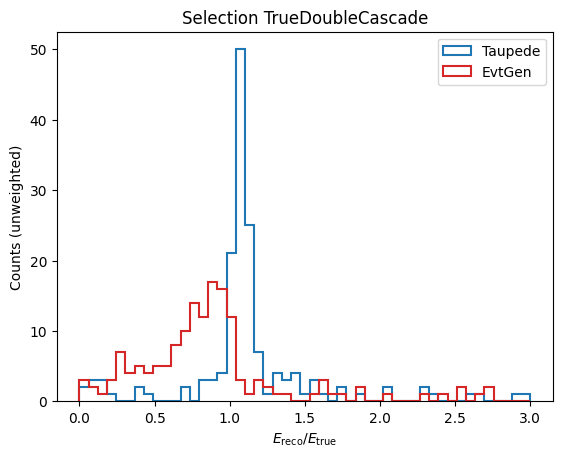

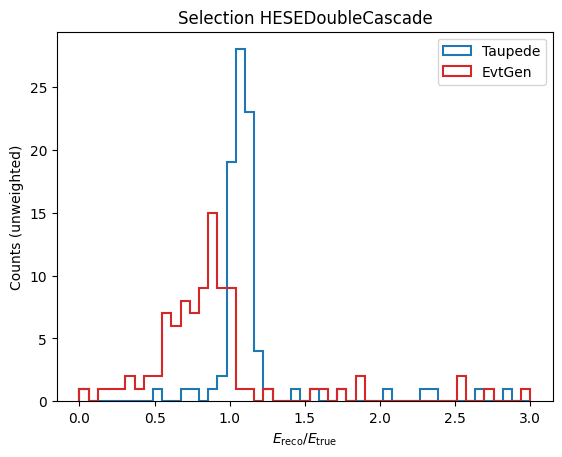

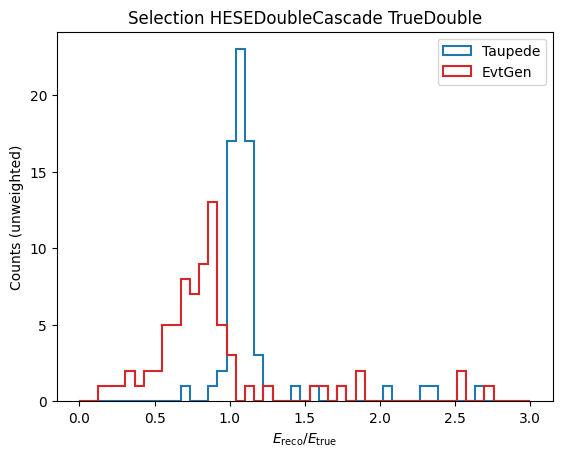

In [22]:
def plot_energy_resolution( selection, bins, name ):

    fig, ax = plt.subplots()

    ax.hist( 10**df_combined["RecoLogETot"]["value"][selection] / df_combined["TrueETot"]["value"][selection], bins=bins, histtype='step', color='C0', linewidth=1.5, label="Taupede")
    ax.hist( (df_combined["MyEgeneratorOutputFrameKey"]["cascade_cascade_00001_energy"][selection] + df_combined["MyEgeneratorOutputFrameKey"]["cascade_energy"][selection])
             / df_combined["TrueETot"]["value"][selection] , bins=bins, histtype='step', color='C3', linewidth=1.5, label="EvtGen")

    ax.set_xlabel(r"$E_{\rm reco} / E_{\rm true}$")
    ax.set_ylabel(r"Counts (unweighted)")
    ax.set_title(f"Selection {name}")

    ax.legend()

    plt.savefig( f"{plotting_path}/total_energy_resolution_selection-{name}.png" )

    plt.show()


bins = np.linspace(0, 3, 50)

for selection in ["TrueDoubleCascade", "HESEDoubleCascade", "HESEDoubleCascade TrueDouble"]:
    plot_energy_resolution( selections[selection], bins, selection )


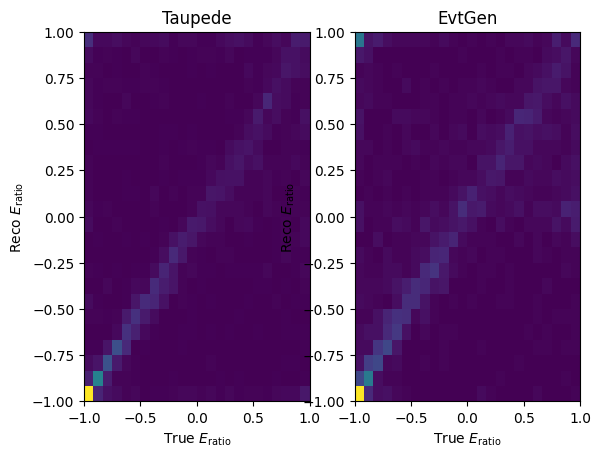

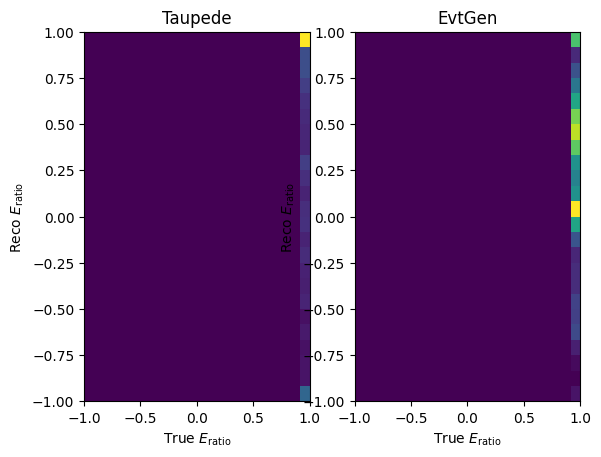

In [9]:
def plot_energy_asymmetry( selection, name ):

    fig, ax = plt.subplots(1,2)

    x_bins = np.linspace(-1, 1, 25)
    y_bins = np.linspace(-1, 1, 25)


    hist = ax[0].hist2d((df_combined["TrueE1"]["value"][selection] - df_combined["TrueE2"]["value"][selection])
                        /(df_combined["TrueE2"]["value"][selection] + df_combined["TrueE1"]["value"][selection]), 
                        df_combined["RecoERatio"]["value"][selection], 
                        bins=[x_bins, y_bins] )


    ax[0].set_xlabel(r"True $E_{\rm ratio}$")
    ax[0].set_ylabel(r"Reco $E_{\rm ratio}$")
    ax[0].set_title(f"Taupede")


    hist = ax[1].hist2d((df_combined["TrueE1"]["value"][selection] - df_combined["TrueE2"]["value"][selection])
                        /(df_combined["TrueE2"]["value"][selection] + df_combined["TrueE1"]["value"][selection]), 
                        (- df_combined["MyEgeneratorOutputFrameKey"]["cascade_cascade_00001_energy"][selection] + df_combined["MyEgeneratorOutputFrameKey"]["cascade_energy"][selection])
                        /(df_combined["MyEgeneratorOutputFrameKey"]["cascade_cascade_00001_energy"][selection] + df_combined["MyEgeneratorOutputFrameKey"]["cascade_energy"][selection]), 
                        bins=[x_bins, y_bins] )


    ax[1].set_xlabel(r"True $E_{\rm ratio}$")
    ax[1].set_ylabel(r"Reco $E_{\rm ratio}$")
    ax[1].set_title(f"EvtGen")

    plt.savefig( f"{plotting_path}/energy_asymmetry_selection-{name}.png" )


    plt.show()



name = "TrueDoubleCascade"
selection = selections[name]
plot_energy_asymmetry( selection=selection, name=name )

name = "TrueSingleCascade"
selection = selections[name]
plot_energy_asymmetry( selection=selection, name=name )



# for selection in ["TrueETot>0", "HESEDoubleCascadeSignal"]:
#     plot_energy_resolution( selections[selection], bins, selection )




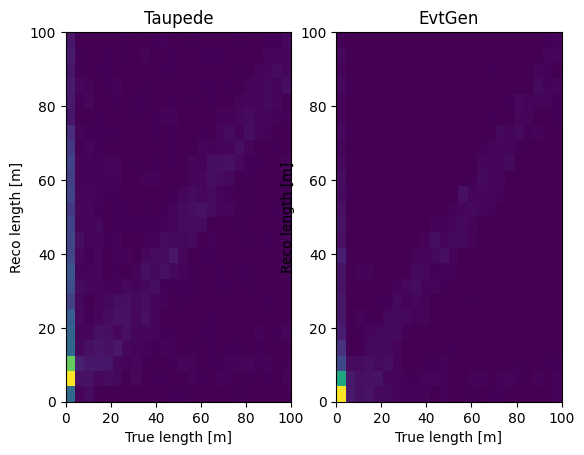

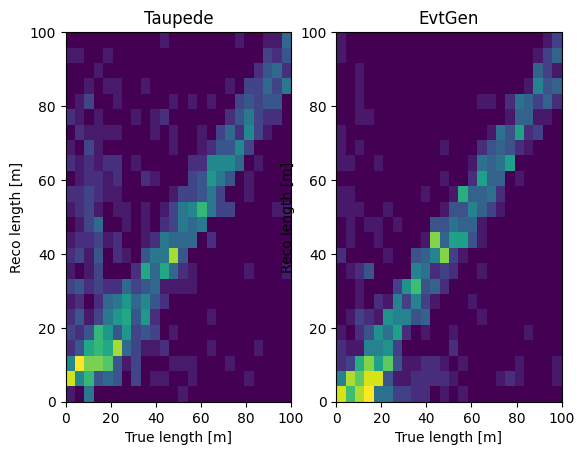

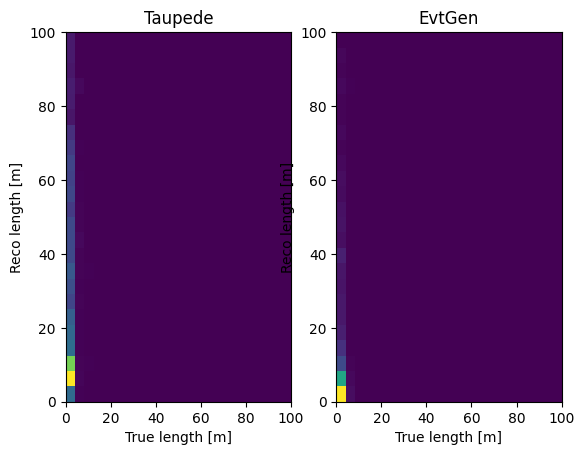

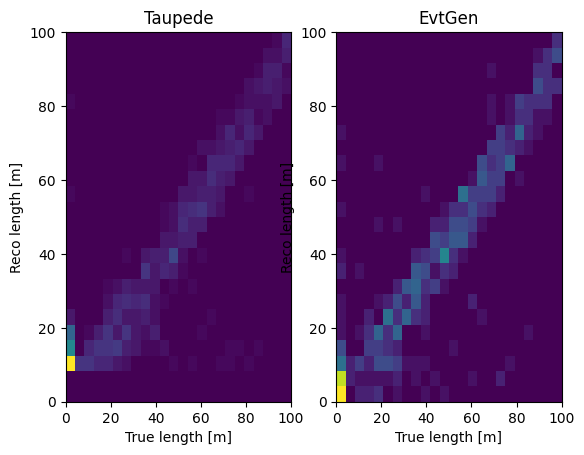

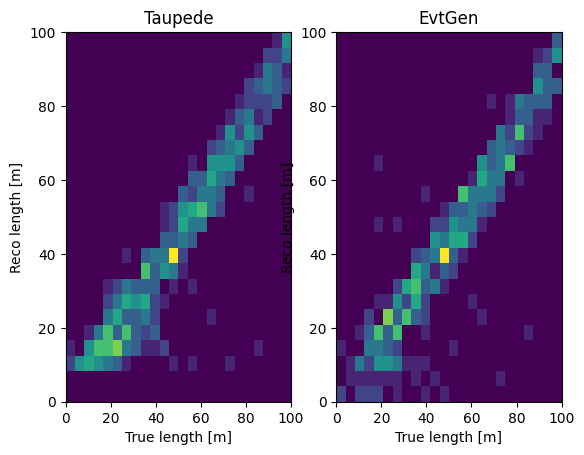

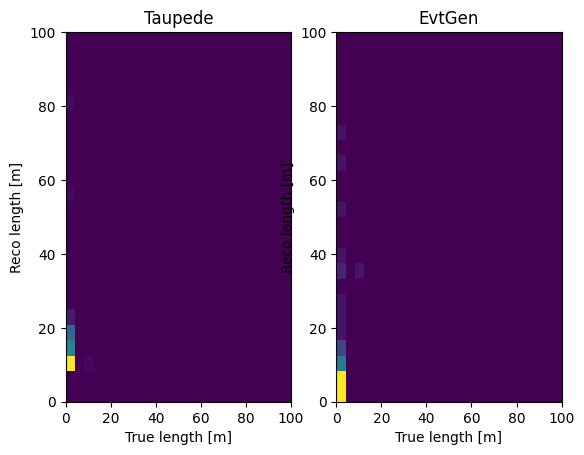

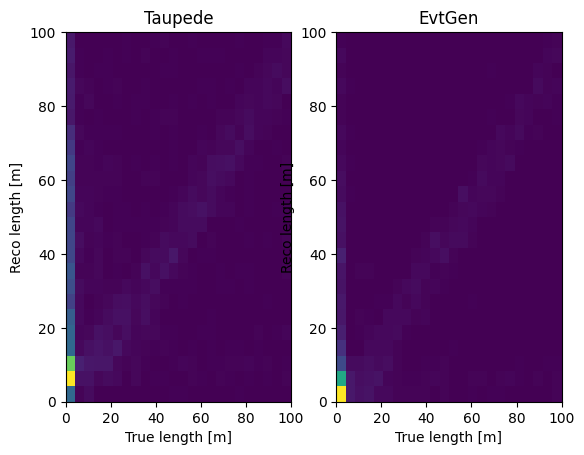

In [21]:
def plot_reco_length_true_length( selection, name ):

    fig, ax = plt.subplots(1,2)

    x_bins = np.linspace(0, 100, 25)
    y_bins = np.linspace(0, 100, 25)

    hist = ax[0].hist2d(df_combined["TrueL"]["value"][selection], 
                        df_combined["HESETaupedeFit1"]["length"][selection], 
                        bins=[x_bins, y_bins] )


    ax[0].set_xlabel(r"True length [m]")
    ax[0].set_ylabel(r"Reco length [m]")
    ax[0].set_title(f"Taupede")


    hist = ax[1].hist2d(df_combined["TrueL"]["value"][selection], 
                        df_combined["MyEgeneratorOutputFrameKey"]["cascade_cascade_00001_distance"][selection], 
                        bins=[x_bins, y_bins] )


    ax[1].set_xlabel(r"True length [m]")
    ax[1].set_ylabel(r"Reco length [m]")
    ax[1].set_title(f"EvtGen")

    plt.savefig( f"{plotting_path}/reco_length_true_length_selection-{name}.png" )

    plt.show()




for selection in selections:
    plot_reco_length_true_length( selections[selection], selection )


